## 1. The Goal of This Project is to predict The Efficeny of BOD , COD , TSS

## All Packages you need for this 

In [1]:
# Core
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
import sklearn
import xlrd

# Pre Processing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Error Metrics 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Regressors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

#Cross Validation 
from sklearn.model_selection import GridSearchCV

## 2. Load The Data into a Pandas Frame

In [2]:
#For Excel file 
df= pd.read_excel('finaldata.xlsx')

# 3. Perform Data Exploratory Analysis
##   Pandas Routine 


In [3]:
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
0,2018-03-01 00:00:00,influent,17.0,7.5,610.0,355.0,1460.0,310.0,0.72,0.75,0.76
1,17/1/2018,influent,14.5,7.8,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,influent,13.7,7.4,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,influent,14.0,6.9,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,influent,17.6,6.8,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,influent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check For Missing Data 

In [4]:
print(df.isnull().sum().sort_values(ascending=False))

TSS                          155
The efficiency of TSS        154
The efficiency of cod        154
The efficiency of the bod    154
TDS                          154
BOD                          154
COD                          154
PH                           154
temp                         154
date                         154
stage                          0
dtype: int64


### Drop Rows with None Values 

In [5]:
df=df.dropna()
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
0,2018-03-01 00:00:00,influent,17.0,7.50,610.0,355.0,1460.0,310.0,0.72,0.75,0.76
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
...,...,...,...,...,...,...,...,...,...,...,...
109,2020-05-07 00:00:00,influent,28.4,6.82,704.0,410.0,1315.0,372.0,0.92,0.91,0.81
110,2020-12-07 00:00:00,influent,25.5,6.93,737.0,310.0,1260.0,345.0,0.83,0.90,0.75
111,19/7/2020,influent,26.1,7.36,610.0,340.0,2330.0,278.0,0.88,0.88,0.79
112,19/8/2020,influent,28.9,7.27,650.0,321.0,1130.0,790.0,0.78,0.79,0.87


### Correct Index

In [6]:
df=df.reset_index(drop=True)
df=df[1:]
df

,date,stage,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
1,17/1/2018,influent,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,influent,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,influent,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,influent,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
5,14/2/2018,influent,13.8,6.90,610.0,390.0,1221.0,345.0,0.77,0.82,0.78
...,...,...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,influent,28.4,6.82,704.0,410.0,1315.0,372.0,0.92,0.91,0.81
109,2020-12-07 00:00:00,influent,25.5,6.93,737.0,310.0,1260.0,345.0,0.83,0.90,0.75
110,19/7/2020,influent,26.1,7.36,610.0,340.0,2330.0,278.0,0.88,0.88,0.79
111,19/8/2020,influent,28.9,7.27,650.0,321.0,1130.0,790.0,0.78,0.79,0.87


### Describe Your Data


In [7]:
df.describe()

,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,22.740179,7.033214,671.285714,386.321429,1237.535714,341.428571,0.796786,0.809196,0.776696
std,4.820386,0.498770,149.533715,84.062527,326.834336,110.710621,0.076420,0.071925,0.104850
min,13.700000,3.670000,60.000000,130.000000,111.000000,93.000000,0.460000,0.530000,0.250000
25%,18.175000,6.800000,610.000000,337.000000,1032.500000,250.000000,0.767500,0.780000,0.720000
50%,23.550000,7.100000,690.000000,390.000000,1236.000000,345.000000,0.800000,0.820000,0.790000
75%,27.050000,7.280000,752.500000,430.000000,1432.000000,406.000000,0.850000,0.852500,0.852500
max,34.000000,8.630000,1040.000000,570.000000,2330.000000,790.000000,0.980000,0.970000,0.940000


In [8]:
df['stage'].values

array(['influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influent',
       'influent', 'influent', 'influent', 'influent', 'influe

> All the Column has the same Value  so we will drop it

#### Drop Specific Columns

In [9]:
df=df.drop(['stage'], 1)
df

,date,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
1,17/1/2018,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
5,14/2/2018,13.8,6.90,610.0,390.0,1221.0,345.0,0.77,0.82,0.78
...,...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,28.4,6.82,704.0,410.0,1315.0,372.0,0.92,0.91,0.81
109,2020-12-07 00:00:00,25.5,6.93,737.0,310.0,1260.0,345.0,0.83,0.90,0.75
110,19/7/2020,26.1,7.36,610.0,340.0,2330.0,278.0,0.88,0.88,0.79
111,19/8/2020,28.9,7.27,650.0,321.0,1130.0,790.0,0.78,0.79,0.87


## Seaborn Routine

### Heat Map

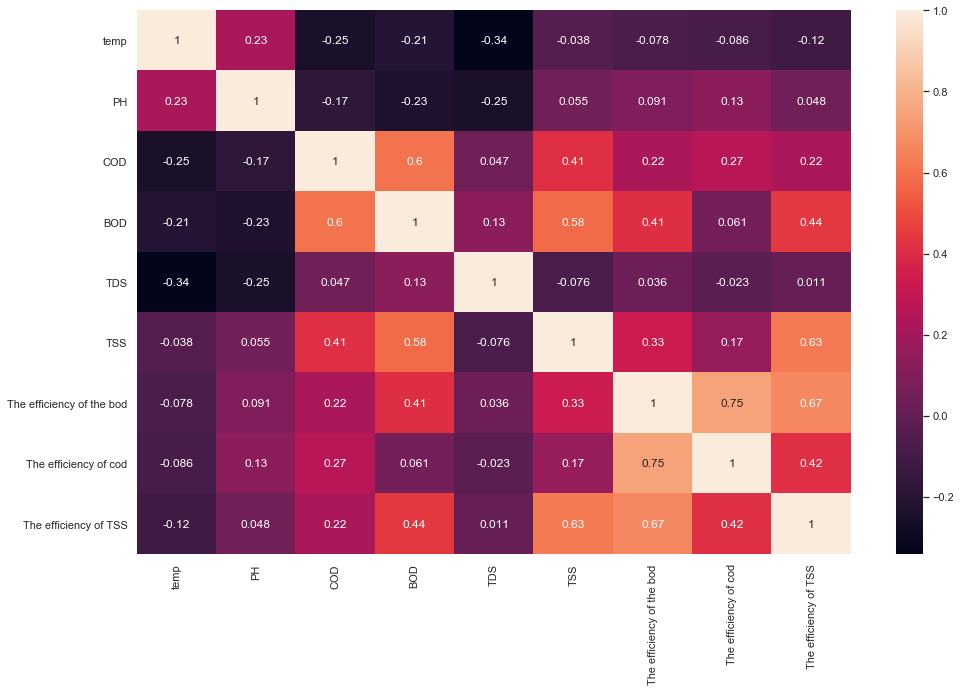

In [10]:
plt.figure(figsize = (16,10))
sns_plot=sns.heatmap(df.corr(),annot= True)
plt.show()

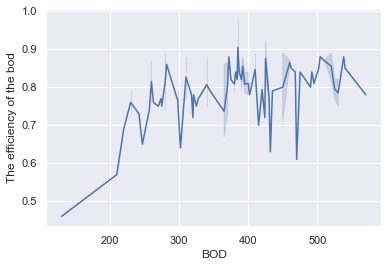

In [11]:
sns_plot = sns.lineplot(x='BOD', y='The efficiency of the bod', data=df)


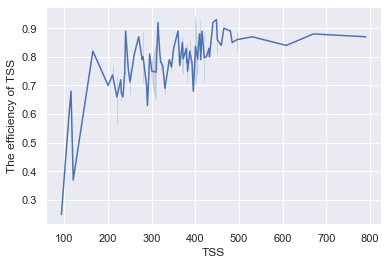

In [12]:
sns_plot = sns.lineplot(x='TSS', y='The efficiency of TSS', data=df)


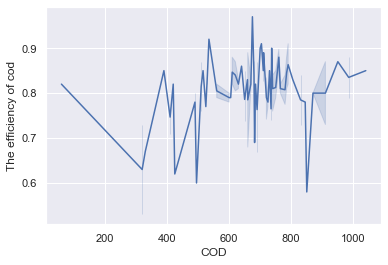

In [13]:
sns_plot = sns.lineplot(x='COD', y='The efficiency of cod', data=df)

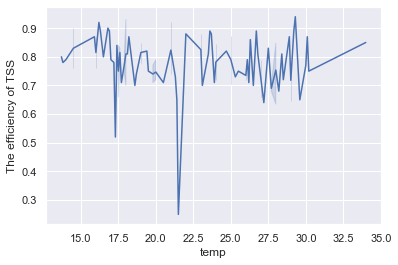

In [14]:
sns_plot = sns.lineplot(x='temp', y='The efficiency of TSS', data=df)

# For The Efficiency of TSS 

## Data Preprocessing


## Splitting Data 

In [15]:
TSSdf=df

In [16]:
y=TSSdf['The efficiency of TSS']
X=TSSdf.drop(['The efficiency of TSS','The efficiency of the bod','The efficiency of cod','date'],1)

In [17]:
X

,temp,PH,COD,BOD,TDS,TSS
1,14.5,7.80,530.0,275.0,1453.0,255.0
2,13.7,7.40,730.0,380.0,1813.0,320.0
3,14.0,6.90,675.0,385.0,1520.0,340.0
4,17.6,6.80,710.0,395.0,1593.0,350.0
5,13.8,6.90,610.0,390.0,1221.0,345.0
...,...,...,...,...,...,...
108,28.4,6.82,704.0,410.0,1315.0,372.0
109,25.5,6.93,737.0,310.0,1260.0,345.0
110,26.1,7.36,610.0,340.0,2330.0,278.0
111,28.9,7.27,650.0,321.0,1130.0,790.0


In [18]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1,random_state= 153 )

## Standardization

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [20]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

#### Error Evaluation

In [21]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 0.0008969291666666674
 Mean Absoulte Error : 0.02480833333333335
 R2 Score : 0.780455889852116


In [22]:
err=abs(y_test-pred2)
Preds=pd.DataFrame(pred2)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual TSS','Predicted TSS', "Error"]
Result =Result.sort_values(by=['Actual TSS'])
Result.reset_index(inplace=True)
Result


,index,Actual TSS,Predicted TSS,Error
0,3,0.68,0.6972,0.0172
1,4,0.75,0.7706,0.0206
2,7,0.75,0.7393,0.0107
3,10,0.78,0.7993,0.0193
4,5,0.79,0.8094,0.0194
5,6,0.79,0.8451,0.0551
6,0,0.80,0.8055,0.0055
7,11,0.83,0.7935,0.0365
8,9,0.84,0.8570,0.0170
9,1,0.88,0.8777,0.0023


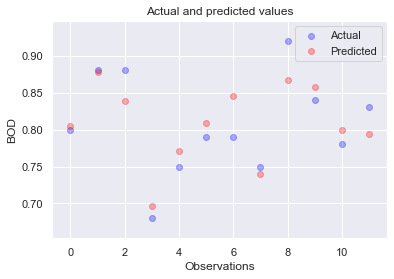

In [23]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('BOD')
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


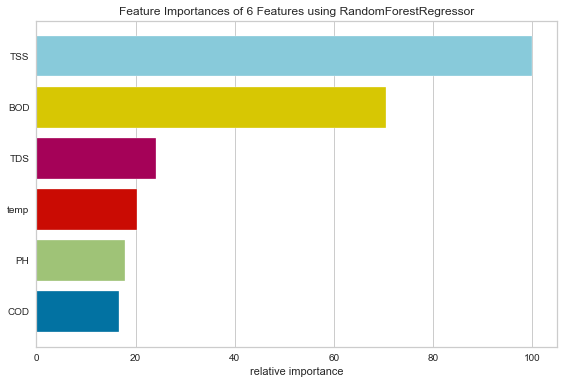

In [24]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

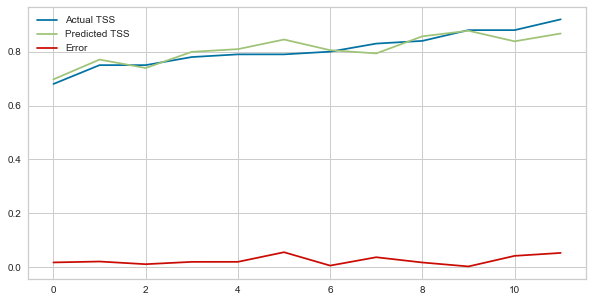

In [25]:
Result.plot(x=Result.index.name, y=['Actual TSS','Predicted TSS','Error'],figsize=(10,5), grid=True  )

In [26]:
df

,date,temp,PH,COD,BOD,TDS,TSS,The efficiency of the bod,The efficiency of cod,The efficiency of TSS
1,17/1/2018,14.5,7.80,530.0,275.0,1453.0,255.0,0.75,0.82,0.76
2,27/1/2018,13.7,7.40,730.0,380.0,1813.0,320.0,0.82,0.85,0.80
3,2018-01-02 00:00:00,14.0,6.90,675.0,385.0,1520.0,340.0,0.98,0.97,0.79
4,2018-08-02 00:00:00,17.6,6.80,710.0,395.0,1593.0,350.0,0.80,0.86,0.83
5,14/2/2018,13.8,6.90,610.0,390.0,1221.0,345.0,0.77,0.82,0.78
...,...,...,...,...,...,...,...,...,...,...
108,2020-05-07 00:00:00,28.4,6.82,704.0,410.0,1315.0,372.0,0.92,0.91,0.81
109,2020-12-07 00:00:00,25.5,6.93,737.0,310.0,1260.0,345.0,0.83,0.90,0.75
110,19/7/2020,26.1,7.36,610.0,340.0,2330.0,278.0,0.88,0.88,0.79
111,19/8/2020,28.9,7.27,650.0,321.0,1130.0,790.0,0.78,0.79,0.87


# The Effiency of Bod 
## Data Preprocessing


## Splitting Data 

In [27]:
dfBod=df

In [28]:
y=dfBod['The efficiency of the bod']
X=dfBod.drop(['The efficiency of TSS','The efficiency of the bod','The efficiency of cod','date'],1)

In [29]:
y

1      0.75
2      0.82
3      0.98
4      0.80
5      0.77
       ... 
108    0.92
109    0.83
110    0.88
111    0.78
112    0.78
Name: The efficiency of the bod, Length: 112, dtype: float64

In [30]:
X

,temp,PH,COD,BOD,TDS,TSS
1,14.5,7.80,530.0,275.0,1453.0,255.0
2,13.7,7.40,730.0,380.0,1813.0,320.0
3,14.0,6.90,675.0,385.0,1520.0,340.0
4,17.6,6.80,710.0,395.0,1593.0,350.0
5,13.8,6.90,610.0,390.0,1221.0,345.0
...,...,...,...,...,...,...
108,28.4,6.82,704.0,410.0,1315.0,372.0
109,25.5,6.93,737.0,310.0,1260.0,345.0
110,26.1,7.36,610.0,340.0,2330.0,278.0
111,28.9,7.27,650.0,321.0,1130.0,790.0


In [31]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1 ,random_state =890)

## Standardization

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [33]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

#### Error Evaluation

In [34]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 0.0011322125000000102
 Mean Absoulte Error : 0.025225000000000126
 R2 Score : 0.6290361774743993


In [35]:
preds=pred2
err=abs(y_test-pred2)
Preds=pd.DataFrame(preds)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual Efficency of Bod','Predicted Efficeny of Bod', "Error"]
Result =Result.sort_values(by=['Actual Efficency of Bod'])
Result.reset_index(inplace=True)
Result


,index,Actual Efficency of Bod,Predicted Efficeny of Bod,Error
0,1,0.72,0.7730,0.0530
1,0,0.73,0.7240,0.0060
2,2,0.73,0.7112,0.0188
3,7,0.75,0.7839,0.0339
4,10,0.75,0.7933,0.0433
5,4,0.77,0.7663,0.0037
6,3,0.81,0.7959,0.0141
7,9,0.81,0.8163,0.0063
8,6,0.85,0.7876,0.0624
9,11,0.85,0.8491,0.0009


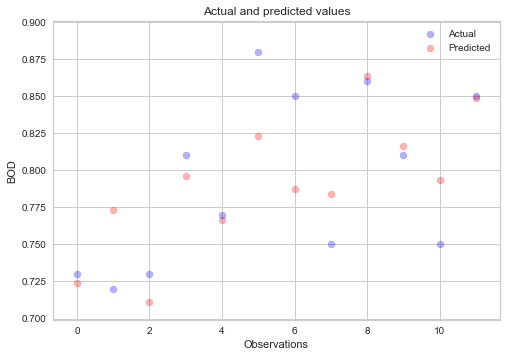

In [36]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('BOD')
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


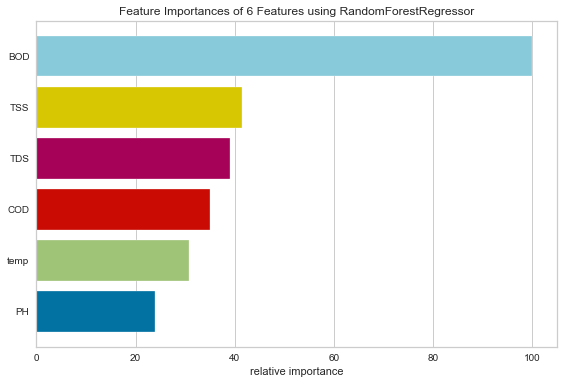

In [37]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

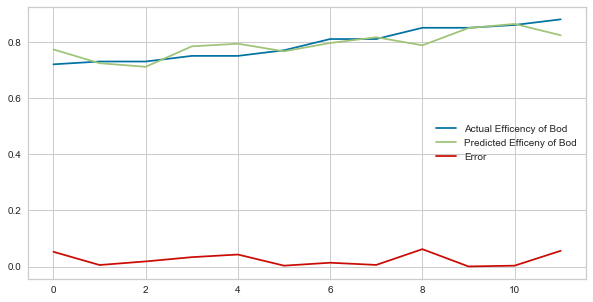

In [38]:
Result.plot(x=Result.index.name, y=['Actual Efficency of Bod','Predicted Efficeny of Bod','Error'],figsize=(10,5), grid=True  )

# The Effiency of Cod 
## Data Preprocessing


## Splitting Data 

In [39]:
dfcod=df

In [40]:
y=dfBod['The efficiency of cod']
X=dfBod.drop(['The efficiency of TSS','The efficiency of the bod','The efficiency of cod','date'],1)

In [41]:
y

1      0.82
2      0.85
3      0.97
4      0.86
5      0.82
       ... 
108    0.91
109    0.90
110    0.88
111    0.79
112    0.81
Name: The efficiency of cod, Length: 112, dtype: float64

In [42]:
X

,temp,PH,COD,BOD,TDS,TSS
1,14.5,7.80,530.0,275.0,1453.0,255.0
2,13.7,7.40,730.0,380.0,1813.0,320.0
3,14.0,6.90,675.0,385.0,1520.0,340.0
4,17.6,6.80,710.0,395.0,1593.0,350.0
5,13.8,6.90,610.0,390.0,1221.0,345.0
...,...,...,...,...,...,...
108,28.4,6.82,704.0,410.0,1315.0,372.0
109,25.5,6.93,737.0,310.0,1260.0,345.0
110,26.1,7.36,610.0,340.0,2330.0,278.0
111,28.9,7.27,650.0,321.0,1130.0,790.0


In [43]:
X_train,X_test,y_train,y_test =train_test_split(X,y , test_size=0.1 ,random_state =64 )

## Standardization

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
np.std(X_train)

1.0

# 5. Training Process

In [45]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
reg2.fit(X_train, y_train)
pred2=reg2.predict(X_test)

#### Error Evaluation

In [46]:
print(' Mean Squared Error :', mean_squared_error(y_test,pred2))
print(' Mean Absoulte Error :', mean_absolute_error(y_test,pred2))
print(' R2 Score :', r2_score(y_test,pred2))

 Mean Squared Error : 0.0006421291666666697
 Mean Absoulte Error : 0.01959166666666683
 R2 Score : 0.6710544290288137


In [47]:
preds=pred2
err=abs(y_test-pred2)
Preds=pd.DataFrame(preds)
Actual=pd.DataFrame(y_test)

Error =pd.DataFrame(err)
Actual.reset_index(inplace=True)
Preds.reset_index(inplace=True)
Error.reset_index(inplace=True)
Result = pd.concat([Actual, Preds,Error], axis=1)

Result=Result.drop(['index'],1)
Result.columns=['Actual Efficency of Cod','Predicted Efficeny of Cod', "Error"]
Result =Result.sort_values(by=['Actual Efficency of Cod'])
Result.reset_index(inplace=True)
Result


,index,Actual Efficency of Cod,Predicted Efficeny of Cod,Error
0,9,0.73,0.6899,0.0401
1,1,0.76,0.7508,0.0092
2,6,0.77,0.7619,0.0081
3,10,0.79,0.8105,0.0205
4,2,0.80,0.7946,0.0054
5,3,0.81,0.8090,0.0010
6,4,0.81,0.8185,0.0085
7,5,0.83,0.8183,0.0117
8,0,0.85,0.8204,0.0296
9,7,0.85,0.8130,0.0370


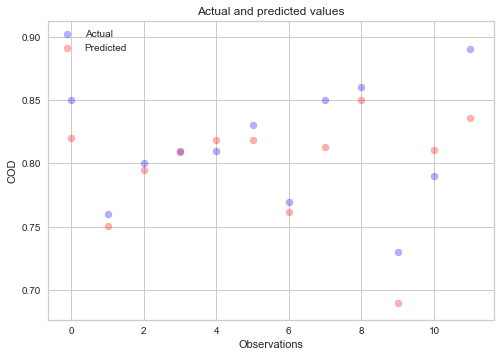

In [48]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
y_pred=pred2
ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('COD')
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


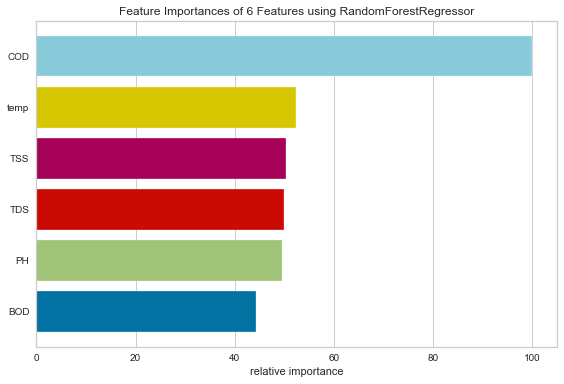

In [49]:
from yellowbrick.model_selection import FeatureImportances
model=reg2
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

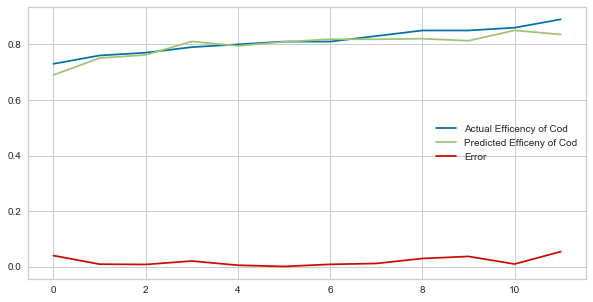

In [50]:
Result.plot(x=Result.index.name, y=['Actual Efficency of Cod','Predicted Efficeny of Cod','Error'],figsize=(10,5), grid=True  )